# Scientific Data Formats and Advanced Plotting

Rebekah Esmaili (rebekah.esmaili@noaa.gov) Research Scientist, STC/JPSS
 
---


## Day 2 Objectives
* You will not learn how to code in Python (but the library has some good books!), but we'll learn a little "on the job" today.
* You will learn to:
    * Import relevant packages for scientific programming
    * Read netCDF and GRIB2 data
    * Creating plots and maps
   
---

## What do I need?
* If you are really new to Python, I recommend using the binder links to run these notebooks remotely.
* If you have some experience, you can either install Anaconda locally on your laptop or on a remote server. I _do not recommend_ using system or shared Python installations unless you are advanced!

## What is Anaconda?
* Anaconda is a package manager
* Comes bundled with Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you are new!

## Launching Jupyter Notebook

Linux/Mac
* Open terminal, cd to the directory where you have your notebooks and data, and type:
```
jupyter notebook
```

Windows
* Start → Anaconda3 → Jupyter Notebook

Jupyter Home Screen

* This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in.
* Note: in all the examples, the path assumed that jupyter is launched from the notebook directory. You will need to change the path to point to your data if this is different.
* Click on New on the top right.

---

## Importing NetCDF files

NetCDF and HDF are self-describing formats are strcutured binary data files that are useful for storing other big datasets. Computationally, it is faster to read in binary-based datasets than text, which needs to be parsed before being stored into a computer’s memory. Because the files are more compact, they are cheaper to store large, long-term satellite data. Furthermore, information about the data can be stored inside the file themselves.

Datasets:
* JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc: A netCDF file that contains Aerosol Optical Depth (AOD) retrieved from a Suomi NPP overpass on 2020 9 Aug.  For this workshop, unused fields were removed.
* gfs_3_20200915_0000_000.grb2: A GRIB2 file that contains GFS analysis
* MOP03JM-201811-L3V95.6.3_thinned.nc: The Nov 2018 CO monthly mean from the Measurement of Pollution in the Troposphere (MOPITT), which is an instrument on the Terra satellite. For this workshop, the file was converted to a netCDF4 file and unused fields were removed.

Many environmental dataset names are quite long. However, the dataset name is encoded to give us   information about the contents. For example:

```
JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150.nc
```
I can learn a several important features of the dataset without opening it:

* Prefix indicates the mission (JRR, for JPSS Risk Reduction)
* Product (Aerosol Optical Depth, or AOD), algorithm version
* Revision number (v1r1)
* Satellite source (npp for Suomi NPP)
* Start (s), end (e), and creation (c) time, which are each followed by the year, month, day, hour, minute, and seconds (to one decimal place). 

In the previous session, you learned how to import three very common packages in Python. If you are unfamiliar with packages or the specific ones below, please review the notes from last time:

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To begin, I need to first import the [netCDF4 package](https://unidata.github.io/netcdf4-python/netCDF4/index.html). There are other modules that can open netCDF4 files, such as [xarray](http://xarray.pydata.org/en/stable/io.html), which has the netCDF4 package as a dependency. So, it is useful to first understand the netCDF4 package.

First, I will import the netCDF4 module:

In [67]:
from netCDF4 import Dataset

So below, I will use the Dataset function to import the above dataset.

In [68]:
fname='data/JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc'
aod_file_id = Dataset(fname)

If I print the contents of the file_id variable, I will get a long list of the global attributes, variables, dimensions, and much more.

In [69]:
aod_file_id

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    Metadata_Conventions: CF-1.5, Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (version 17, 24 March 2011)
    project: JPSS Risk Reduction: Enterprise Aerosol Optical Depth/Particle Size Products
    institution: DOC/NOAA/NESDIS/NDE > S-NPP Data Exploitation, NESDIS, NOAA, U.S. Department of Commerce
    naming_authority: gov.noaa.nesdis.nde
    satellite_name: NOAA-20
    instrument_name: VIIRS
    title: JRR-AOD
    summary: Enterprise Aerosol Optical Depth/ Aerosol Particle Size Products
    history: JRR-AOD v2r3
    processing_level: NOAA Level 2
    references: 
    id: eb380c20-1215-4905-b1bd-a10213a28086
    Metadata_Link: JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150.nc
    start_orbit_number: 14649
    end_orbit_number: 14649
    day_night_data_flag: day
    ascend_descend_data_flag: 0
    time_coverage_star

The output above is worth inspecting. From the first bolded line, this file follows netCDF4 [CF-1.5 conventions](https://cfconventions.org/). Some of the information that I learned from the file name is also present: this product is the JPSS Risk Reduction Unique Aerosol Optical Depth (title) Level 2 product (processing_level) and the data was collected from the Suomi NPP (satellite_name) VIIRS instrument (instrument_name). The start (time_coverage_start) and end times (time_coverage_end) metadata fields are consistent with the filename. I recommend that you read netCDF file header contents, especially the first time you are working with new data. Note that you can also use tools like [Panoply](https://www.giss.nasa.gov/tools/panoply/) to inspect the contents of the netCDF file outside of Python.

In [70]:
aod_file_id.variables.keys()

dict_keys(['Latitude', 'Longitude', 'AOD550'])

In the next example, I will use the AOD500 variable, which is the primary product in this file. AOD is a unitless measure of the extinction of solar radiation by particles suspended in the atmosphere. High values of AOD can indicate the presence of dust, smoke, or another air pollutant while low values indicate a cleaner atmosphere.

I can extract AOD using the .variable function. It's a 2-dimensional array, so the code below has two \[:,:\]

In [71]:
AOD_550 = aod_file_id.variables['AOD550'][:,:]
AOD_lat = aod_file_id.variables['Latitude'][:,:]
AOD_lon = aod_file_id.variables['Longitude'][:,:]

If you check the type of AOD_500, you can see it's a masked array:

In [72]:
type(AOD_550)

numpy.ma.core.MaskedArray

The missing values are masked out, so if we do statistics on the array, it will not include them.

In [73]:
avgAOD = AOD_550.mean()
print(avgAOD)

0.5643748138037024


---
**Exercise 1**: Importing netCDF files
1. Open the file "MOP03JM-201811-L3V95.6.3_thinned.nc" using the netCDF4 library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

## Importing GRIB2 files

Binary data that take on table-driven code form require external tables to decode the data type. Thus, they are not self-describing. These files follow a methodology of encoding binary data and not a distinct file type. Binary Universal Form for the Representation of meteorological data (BUFR) and GRIdded Binary (GRIB) are two common table-driven formats in Earth Sciences. 

American NWS models (e.g. GFS, NAM, and HRRR) and the European (e.g. ECMWF) models are stored in GRIB2. While they share the same format, there are some differences in how each organization stores its data. GRIB2 are stored as binary variables with a header describing the data stored followed by the variable values.

Currently, some of the GRIB2 decoders have problems parsing the American datasets because the American models have multiple pressure dimensions (depending on the variable) while the European models have one. Still, there are ways the data can be inspected by using the pygrib and cfgrib packages.

In [74]:
import pygrib

The pygrib package (Unidata) has an interface between Python and the GRIB-API (ECMWF). ECMWF has since ended support for the GRIB-API as the primary GRIB2 encoded and decoder and now use ecCodes. However, the package is still maintained by the developer (https://jswhit.github.io/pygrib/) and is useful for parsing NCEP weather forecast data.

In [75]:
filename = 'data/gfs_3_20200915_0000_000.grb2'
gfs_grb2 = pygrib.open(filename)
records = [str(grb) for grb in gfs_grb2]

There are 522 individual data product definition in this file (from the *len(messages)* command), so first let’s inspect the contents of one line to start:

In [76]:
records[12]

'13:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202009150000'

Colons (:) separate the sections of the product definition in this GRIB2 message. The elements are index (1), variable name and units (2-3), and spatial, vertical, and temporal definitions (4-8). There is one record for each pressure level and time. I can then extract all variables using the .select(name=[variable]) command. Below, I select all the Temperature records (there are 46, which I see by using the len(temps) command). Since it is a long list, I am only printing some of these below:

In [77]:
temps = gfs_grb2.select(name='Temperature')

If I want to extract temperature at 85000 Pa, I can use the index (315) to pull that record:

In [78]:
temp = gfs_grb2[315]


Then, using .values I can extract the data from the record:

In [79]:
temp.values

array([[269.94385, 269.94385, 269.94385, ..., 269.94385, 269.94385,
        269.94385],
       [268.64386, 268.74387, 268.74387, ..., 268.44385, 268.54385,
        268.54385],
       [267.24387, 267.34384, 267.34384, ..., 267.24387, 267.24387,
        267.24387],
       ...,
       [237.34386, 237.34386, 237.34386, ..., 237.34386, 237.34386,
        237.34386],
       [236.24385, 236.24385, 236.14384, ..., 236.54385, 236.44385,
        236.34386],
       [237.14384, 237.14384, 237.14384, ..., 237.14384, 237.14384,
        237.14384]], dtype=float32)

I can also extract the grid information and other import metadata for this record. To see all available information, use the .keys() command:

In [80]:
temp.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition

The coordinates can be extracted using the .latitude and .longitude. I can additionally extract the level, units, and forecast time from the file:

In [81]:
lat = temp.latitudes
lon = temp.longitudes
level = temp.level
units = temp.units
analysis_date = temp.analDate
fcst_time = temp.forecastTime

In [82]:
temp.values.shape

(181, 360)

## Plotting 3-dimensional Data

In Example 1, we imported total CO, which is reproduced below:

In [83]:
fname = 'data/MOP03JM-201811-L3V95.6.3_thinned.nc' 
mop_file_id = Dataset(fname, 'r')

Recall that to inspect the groups and variables, you can use the visit command:

In [84]:
mop_file_id

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): YDim(180), XDim(360)
    variables(dimensions): float32 Latitude(YDim), float32 Longitude(XDim), float32 RetrievedCOTotalColumnDay(XDim, YDim)
    groups: 

This file has a lot of gridded values. I will import RetrievedCOTotalColumnDay which is a 2-dimensional variable in the HDFEOS/GRIDS/MOP03/Data Fields/ group. I will also need latitude and longitude, which are both one dimensional:

In [85]:
co = mop_file_id["RetrievedCOTotalColumnDay"][:,:]
lat = mop_file_id["Latitude"][:]
lon = mop_file_id["Longitude"][:]

Contour plots and mesh plots are two useful ways of looking at 3-dimensional data.

In [86]:
tmp_x = [1,2]
tmp_y = [3,4,5]

np.meshgrid(tmp_x, tmp_y)

[array([[1, 2],
        [1, 2],
        [1, 2]]),
 array([[3, 3],
        [4, 4],
        [5, 5]])]

Returning to the example, I will make a meshgrid of the 1-dimensional latitude and longitude coordinates:

In [87]:
X_co, Y_co = np.meshgrid(lon, lat)

Before plotting, I need to check if all the dimensions match. However, after comparing the shape of co to X_co, I can see that the dimensions are flipped:

In [88]:
co.shape, X_co.shape

((360, 180), (180, 360))

To make the two arrays match, I can use the *.transpose()* function to switch the x and y coordinates in co.

In [89]:
co = co.transpose()

If you inspect the data, co has many -9999. values, which are likely missing values. I showed how to filter missing values using the fill value (which is usually stored in the _FillValue attribute of the variable). 

Below, I extract the fill value and save it to a value called missing. Then, I replace all missing values with np.nan so that they are not plot included in the plot:

As I did in the proceeding sections, I call the plt.subplots() to generate the empty figure and axis. In the next line, I call ax.contourf and input the X_co, Y_co, and transposed co variables. co acts as a color value, which becomes the third dimension of the plot. I store this object into a variable co_plot so that I can pass it into ax.colorbar in order to map the colors to numeric values. I am omitting labels and further aesthetics to simplify the code:

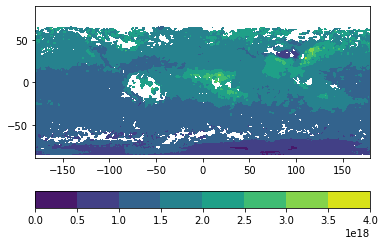

In [90]:
# contourf
fig, ax = plt.subplots()
co_plot = ax.contourf(X_co, Y_co, co)
fig.colorbar(co_plot, orientation='horizontal', ax=ax)
plt.show()

In the image above, you can see that there are regions where there are higher levels of CO (in molecules/cm2). The data are clustered together and have global coverage, so a contour plot is a relevant choice in this scenario.

Like contour plots, mesh plots are also 2-dimensional plots that display 3-dimensions of information using x, y, coordinates and z for a color scale. However, mesh plots do not perform any smoothing and display data as-is on a regular grid. However, since many satellite datasets are swath-based, irregularly spaced data needs to be re-gridded in order to display it as a mesh grid. In the code block below, let’s compare how the MOPITT data looks using pcolormesh command with the previous example using contour. I made no other changes to the plot other than the call to the plot type.

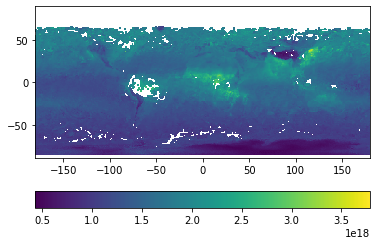

In [91]:
#pcolormesh
fig, ax = plt.subplots()
co_plot = ax.pcolormesh(X_co, Y_co, co, shading='auto')
fig.colorbar(co_plot, orientation='horizontal')
plt.show()

You might notice that there is more structure in the mesh plot than the filled contour. This is useful if you wish to examine fine structure and patterns. Remote sensing data are often noisy because atmospheric and surface conditions, such as clouds or snow, which can introduce errors into the retrieval. I usually prefer pcolormesh to contourf, but the latter is an appropriate choice depending on the application.

---
**Exercise 2**: Plot 3-dimensional data

Plot *AOD_lat*, *AOD_lon*, and *AOD_500* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file as:

1. Check the dimensions for all variables using *.shape*.
2. Do you need to generate a meshgrid with *np.meshgrid()*?
3. Create a contour plot

---
**Solution:**

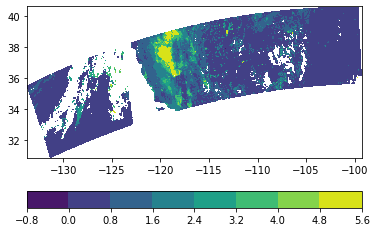

In [92]:
AOD_lat.shape, AOD_lon.shape

fig, ax = plt.subplots()
co_plot = ax.contourf(AOD_lon, AOD_lat, AOD_550)
fig.colorbar(co_plot, orientation='horizontal')
plt.show()

## Adding Maps to datasets

The package Cartopy add mapping functionality to Matplotlib. Cartopy provides an interface to obtain continent, country, and feature details to overlay onto your plot. Furthermore, Cartopy also enables you to convert your data from one map projection to another, which requires a cartesian coordinate system to the map coordinates. Matplotlib natively supports the six mathematical and map projections (Aitoff, Hammer, Lambert, Mollweide, polar, and rectilinear) and combined with Cartopy, data can be transformed to a total of 33 possible projections.

In [93]:
from cartopy import crs as ccrs

In [94]:
gfs_temp = temp.values
gfs_x, gfs_y = np.meshgrid(lon, lat)

gfs_x.shape, gfs_y.shape, gfs_temp.shape

((180, 360), (180, 360), (181, 360))

In [95]:
gfs_temp[0:180,:]

array([[269.94385, 269.94385, 269.94385, ..., 269.94385, 269.94385,
        269.94385],
       [268.64386, 268.74387, 268.74387, ..., 268.44385, 268.54385,
        268.54385],
       [267.24387, 267.34384, 267.34384, ..., 267.24387, 267.24387,
        267.24387],
       ...,
       [237.44385, 237.34386, 237.14384, ..., 238.24385, 237.84386,
        237.54385],
       [237.34386, 237.34386, 237.34386, ..., 237.34386, 237.34386,
        237.34386],
       [236.24385, 236.24385, 236.14384, ..., 236.54385, 236.44385,
        236.34386]], dtype=float32)

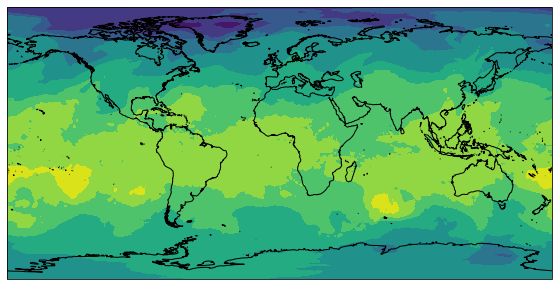

In [96]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.contourf(gfs_x, gfs_y, gfs_temp[0:180,:])

ax.coastlines('50m')
plt.show()

In the next example, I will switch from Plate Carrée to Lambert Azimuthal Equal Area. I must define the projection twice. In the plt.subplots line, I must define the to coordinates (ccrs.LambertAzimuthalEqualArea), which is how I want to axes to show the data.  In the ax.scatter line, I use the transform keyword argument in scatter to define the from coordinates (Plate Carrée), which are the coordinates that the data formatted for.

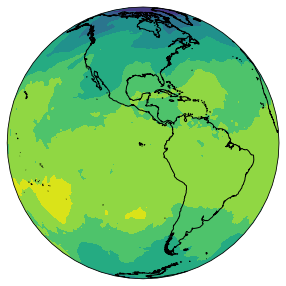

In [97]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.Orthographic(-90, 0))

ax.contourf(gfs_x, gfs_y, gfs_temp[0:180,:], transform=ccrs.PlateCarree())

ax.coastlines('50m')
plt.show()

---
**Exercise 3** Adding maps to plots

Using *AOD_lat*, *AOD_lon*, and *AOD_550* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file)

1. Create a *pcolormesh* plot
2. Add the coastlines to a standard Plate Caree plot using *projection=* option.

---
**Solution**:

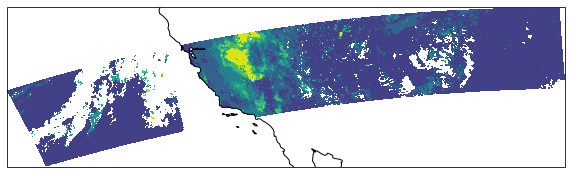

In [99]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.contourf(AOD_lon, AOD_lat, AOD_550)

ax.coastlines('50m')
plt.show()

## Scripting with Python

### Creating scripts from Jupyter Notebooks
One of the simplest ways to create a script is to convert an existing Jupyter notebook. As an example, I created a notebook named script_example that only contains one line of code: print(“Hello Earth”). I can convert any Jupyter Notebook to a script by going to File → Download as → Python (.py):
 

This will download a new file (script_example.py) to your computer. If you open the file using your text editor, you will see:

```

#!/usr/bin/env python
# coding: utf-8

# In[1]:

print("Hello Earth")
```

You will notice that the script contains the line numbers (*ln\[1\]*), which in my opinion is unnecessary and should be removed from your script. Beginners, you can delete this extra formatting from your file.

### Running Python scripts from the command line

Now I am finished editing the code and I want to run it. I will discuss two ways you can run Python scripts:

1. Using the command line interpreter
2. Using iPython (Figure 11 1)

iPython is an interactive command line that allows you to run code in chunks. In fact, Jupyter Notebook is built using iPython, which explains the similarity in behavior.
 
* Windows: I suggest using the Anaconda Prompt which you can access from the start menu or using Anaconda Navigator. 
* MacOs/Linux: open the Terminal app. 

Once the command line is open, you start in a default location. For example, I am using Windows and when I launch the Anaconda Prompt, I see:

```
(base) C:\Users\rebekah>
```

Now, I want to navigate to where our script is. To do this, I will change directories using the cd. For example, if your code is stored in C:\Documents\Python, you can type:
```

cd C:\Users\rebekah\Documents\Python
```

The command line will now be updated showing:

```
(base) C:\Users\rebekah\Documents\Python>
```

Now that I am in the right place, I can call the Python interpreter, which to convert your code into a format that your computer can understand and executes the command. If you installed Anaconda, this includes a Python interpreter than I can use (python3). So, to run the script, type:

```
python3 hello_world.py
```

If successful, “Hello Earth” should print to your screen.

A second method is to use iPython, which allows you to open Python in interactive mode. Unlike the command line method, iPython will let you run code line-by-line. So, like Jupyter Notebook, you have the option to copy and paste you code from the text editor in chunks into the iPython window. You can also call the entire script inside iPython. This is done by starting iPython and using the command %run \[script name\].py. Below is a capture from my terminal:

```
Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 7.12.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: %run script_example.ipynb
Hello Earth
```

One advantage of using iPython is that after the script finishes running, variables that were generated in the script are still in memory. Then, you can print or operate on the variables to either debug or to develop your code further. 

You may have noted two differences in workflow for write code in scripts versus notebooks, (1) that code cannot be inline and (2) the program must run fully to the end.


### Handling output when scripting

In the previous example, I printed text to the screen but Python’s capable of saving figures and data. Recall from Section 10.1, the plots can be saved to file using the plt.savefig() command instead of plt.show().

It is possible to directly display your graphics using the X11 protocol (by default in Linux) with XQuartz (Mac) or PuTTy (Windows). 

I typically discourage this because satellite imagery tends to be very large and thus slow to display remotely. From my experience, it is usually faster to write an image to a file and then view the plot after it is fully rendered.

## Summary:

You learned:

* Very basic built-in Python functions and operations
* How to import scientific data formats, like netCDF and GRIB2
* Worked with arrays and lists
* How to create a simple plot
* Some basic scripting with Python